In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
df=pd.read_csv('/content/drive/MyDrive/DATASET/Titanic-Dataset.csv')

In [108]:
test=pd.read_csv('/content/drive/MyDrive/DATASET/Titanic-Dataset.csv')


In [109]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C




```
# This is formatted as code
```

# EDA


In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [112]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [113]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
df=df.drop(['PassengerId','Cabin','Ticket','Name','Embarked'],axis=1)
test=test.drop(['PassengerId','Cabin','Ticket','Name','Embarked'],axis=1)


In [115]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [116]:
test.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0


In [117]:
test.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [119]:
test.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
886,0,2,male,27.0,0,0,13.00
887,1,1,female,19.0,0,0,30.00
888,0,3,female,NaN,1,2,23.45
889,1,1,male,26.0,0,0,30.00
890,0,3,male,32.0,0,0,7.75


In [120]:
X=df.drop('Survived',axis=1)

In [121]:
y=df['Survived']

In [122]:
X['Gender_Male']=X.Sex.map({'female':0,'male':1})

In [123]:
test['Gender_Male']=test.Sex.map({'female':0,'male':1})

In [124]:
X=df.drop('Survived',axis=1)

In [125]:
y=df['Survived']

In [126]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [127]:
X['Age'].fillna(value=X['Age'].mean(),inplace=True)
test['Age'].fillna(value=test['Age'].mean(),inplace=True)


/tmp/ipython-input-127-3643427757.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(value=X['Age'].mean(),inplace=True)
/tmp/ipython-input-127-3643427757.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [128]:
test['Fare'].fillna(value=test['Fare'].mean(),inplace=True)

/tmp/ipython-input-128-3641929573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(value=test['Fare'].mean(),inplace=True)


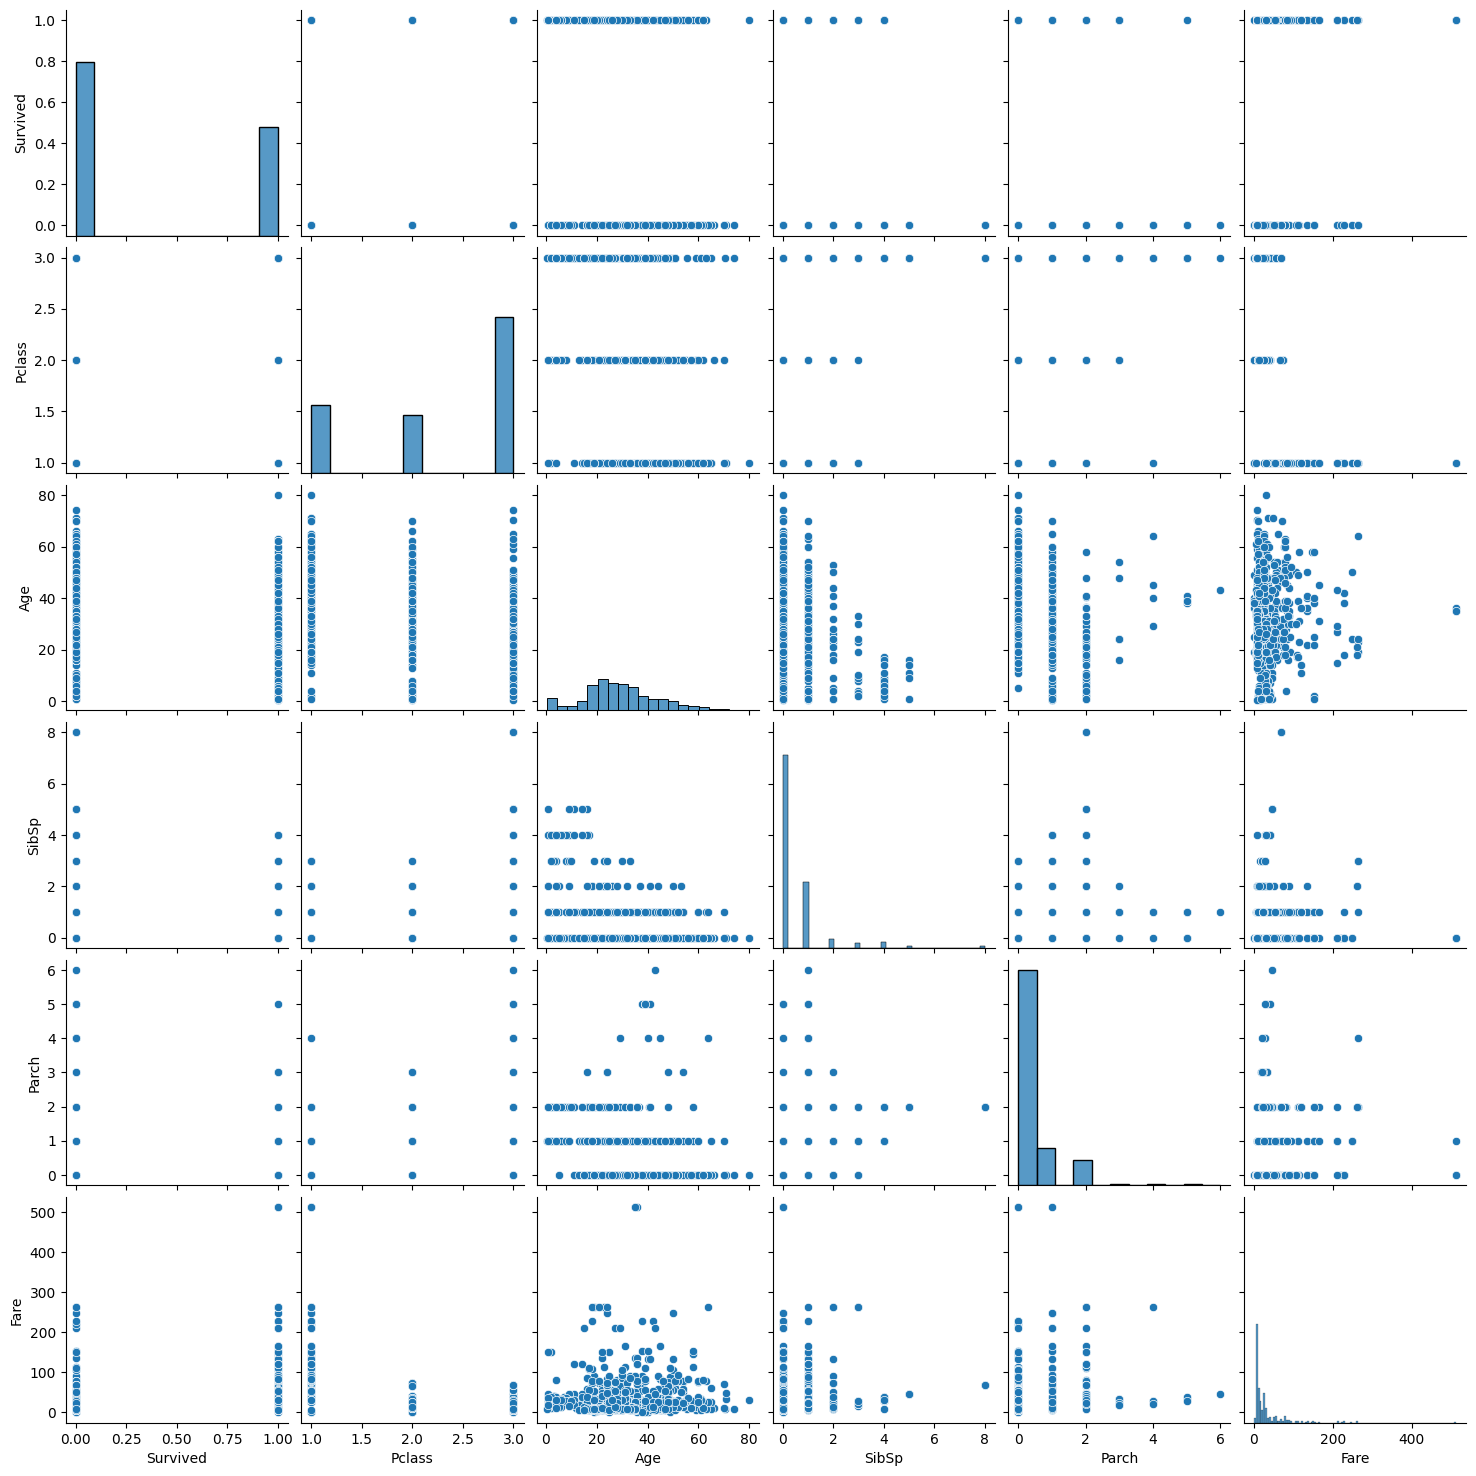

In [129]:
sns.pairplot(df)

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [131]:
# Convert the 'Sex' column in both X_train and X_test to numeric using one-hot encoding
X_train = pd.get_dummies(X_train, columns=['Sex'], drop_first=True)  # drop_first to avoid multicollinearity
X_test = pd.get_dummies(X_test, columns=['Sex'], drop_first=True)
# Now you can apply the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# EDA (visualization)

In [132]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000


<Axes: xlabel='Sex', ylabel='count'>

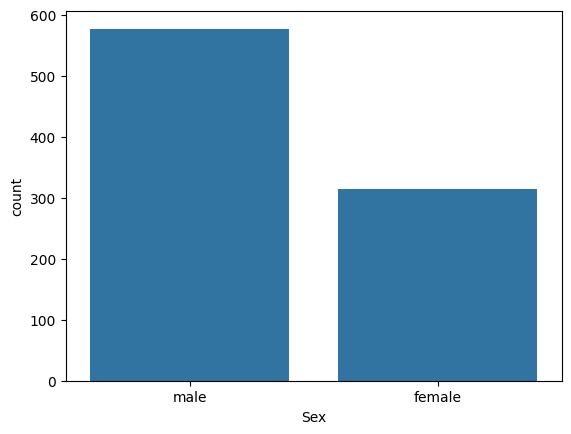

In [133]:
sns.countplot(x=df['Sex'])

<Axes: xlabel='Survived', ylabel='count'>

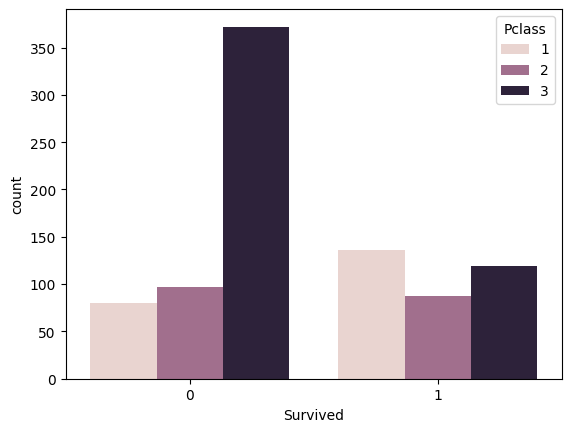

In [134]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])

<Axes: xlabel='Survived', ylabel='count'>

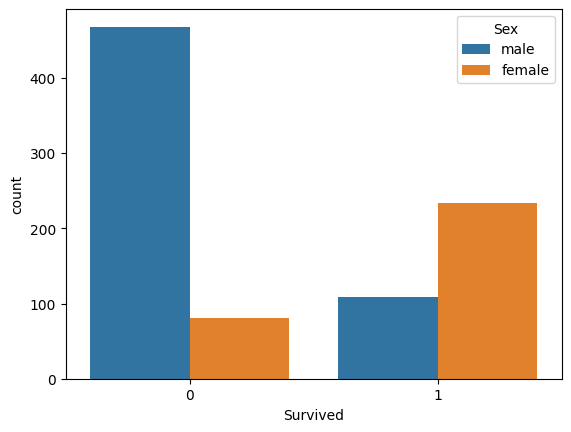

In [135]:
sns.countplot(x=df['Survived'],hue=df['Sex'])

<Axes: xlabel='Survived', ylabel='count'>

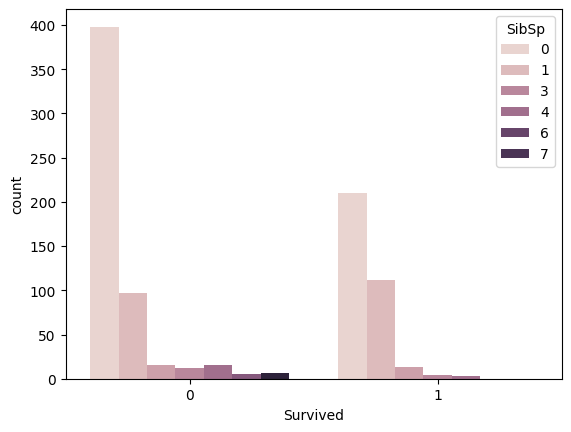

In [136]:
sns.countplot(x=df['Survived'],hue=df['SibSp'])

<Axes: xlabel='Survived', ylabel='count'>

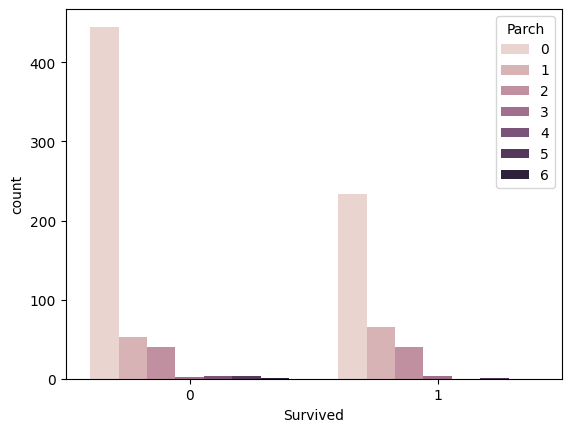

In [137]:
sns.countplot(x=df['Survived'],hue=df['Parch'])

<Axes: xlabel='Survived', ylabel='count'>

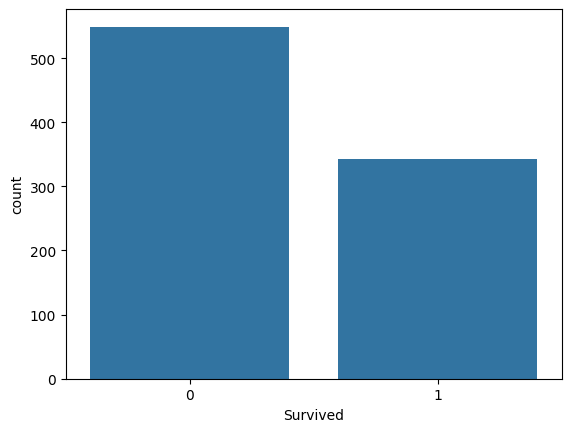

In [138]:
sns.countplot(x=df['Survived'])

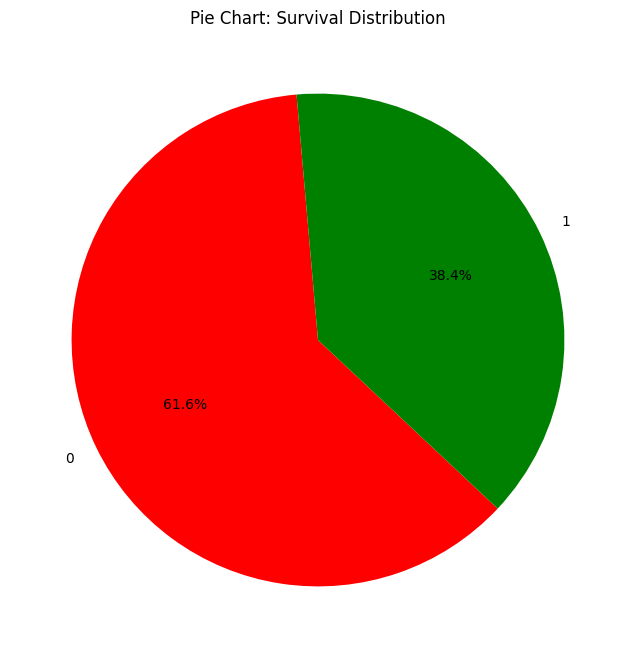

In [139]:
survival_counts = df['Survived'].value_counts()
survival_counts.plot.pie(autopct='%1.1f%%', startangle=95, figsize=(8, 8), colors=['red', 'green'])
plt.title('Pie Chart: Survival Distribution')
plt.ylabel('')
plt.show()

Numerical_Feactures

<Axes: xlabel='Age', ylabel='Count'>

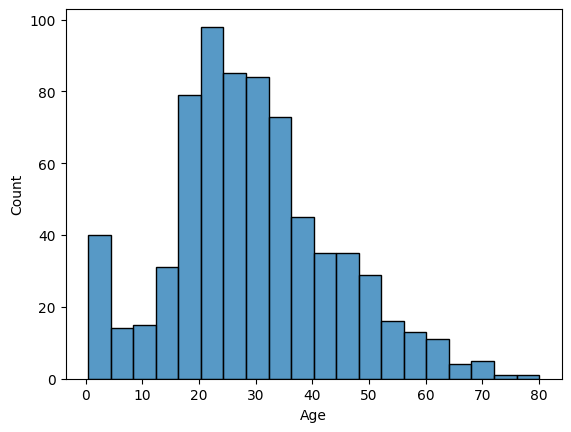

In [140]:
sns.histplot(df['Age'])

<Axes: xlabel='Survived', ylabel='Count'>

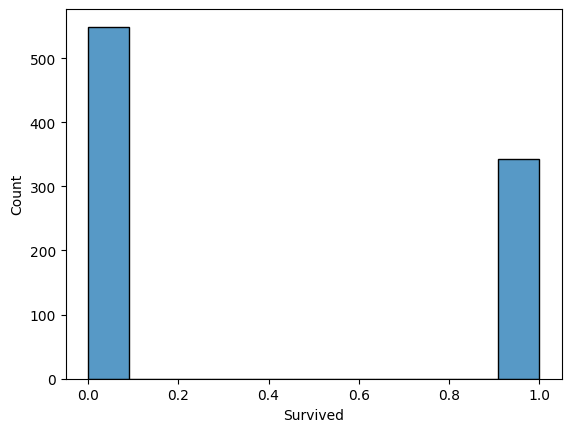

In [141]:
sns.histplot(df['Survived'])

<Axes: xlabel='Fare', ylabel='Count'>

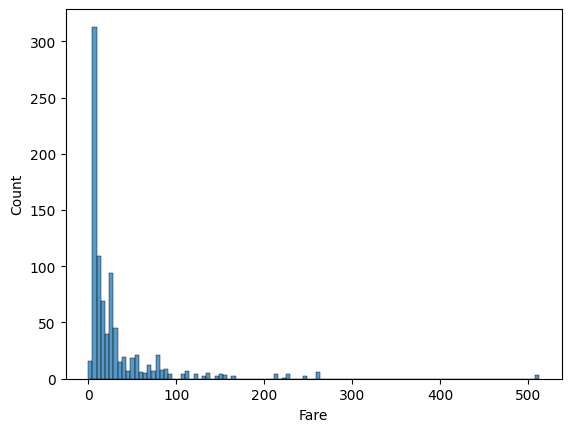

In [142]:
sns.histplot(df['Fare'])

<Axes: xlabel='Pclass', ylabel='Count'>

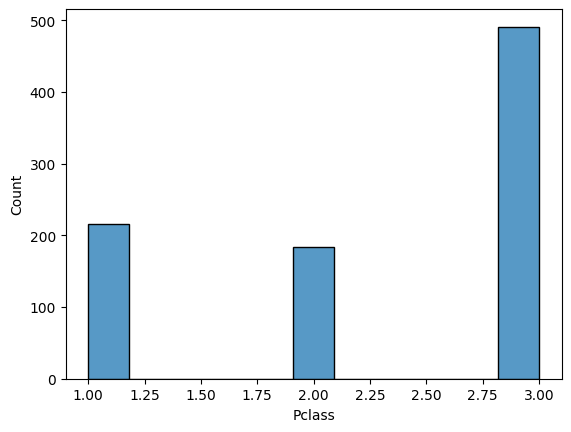

In [143]:
sns.histplot(df['Pclass'])

<Axes: xlabel='SibSp', ylabel='Count'>

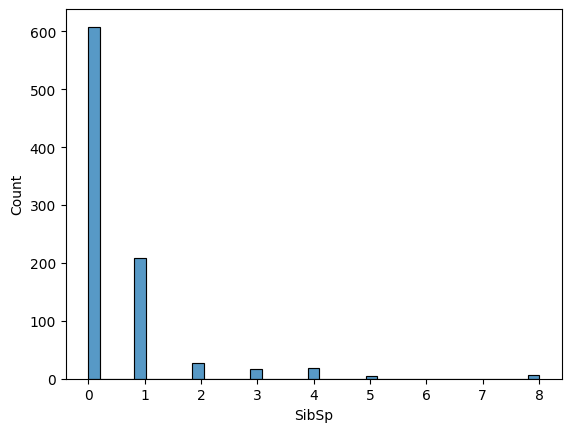

In [144]:
sns.histplot(df['SibSp'])

<Axes: xlabel='Pclass', ylabel='count'>

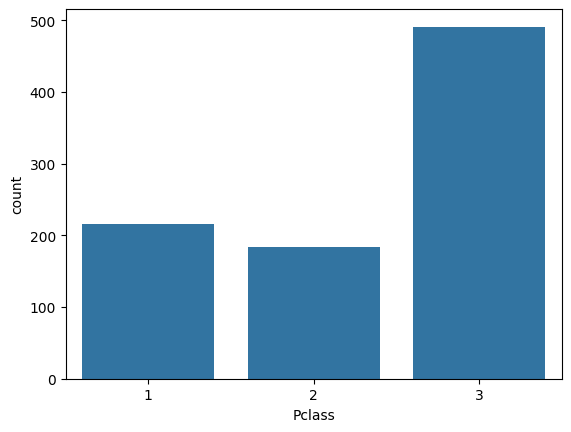

In [145]:
sns.countplot(x=df['Pclass'])

<Axes: xlabel='SibSp', ylabel='count'>

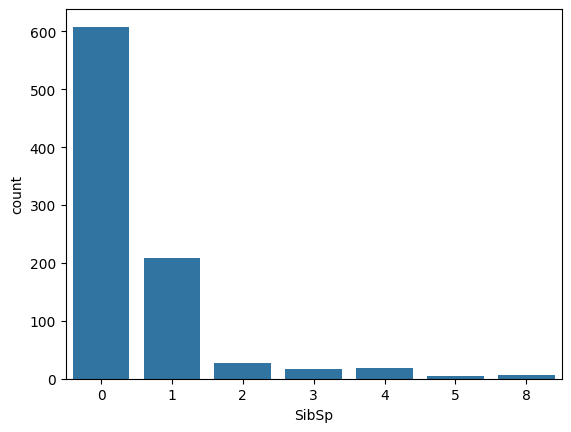

In [146]:
sns.countplot(x=df['SibSp'])

<Axes: xlabel='Survived', ylabel='Age'>

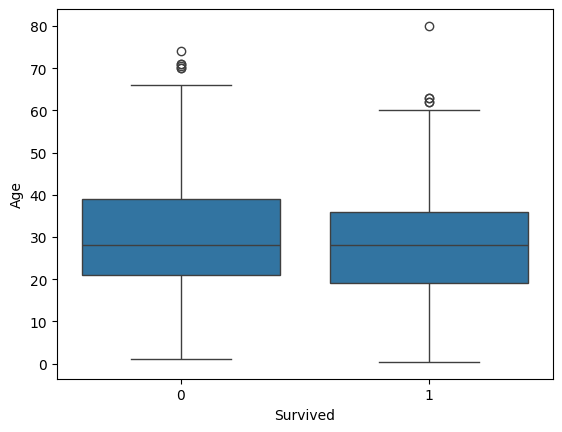

In [147]:
sns.boxplot(x=df['Survived'],y=df['Age'])

<Axes: >

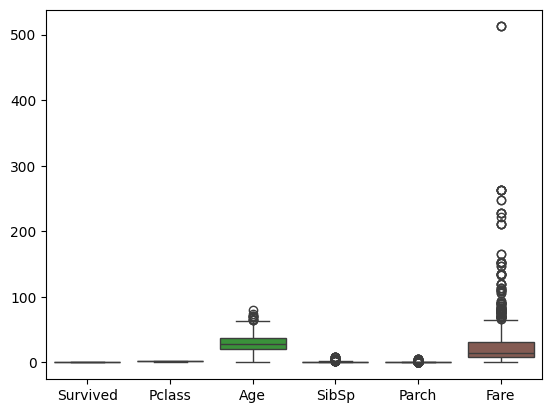

In [148]:
sns.boxplot(df)

<Axes: xlabel='Survived', ylabel='Age'>

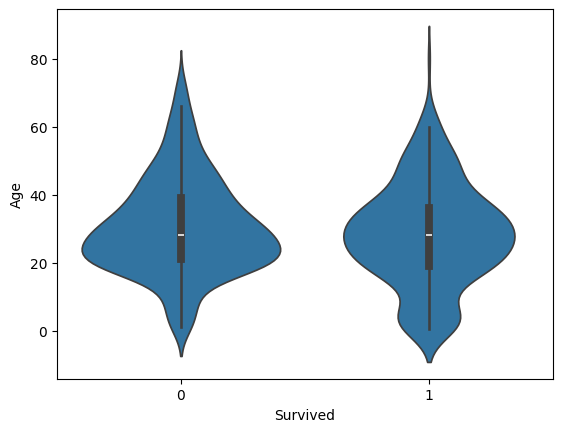

In [149]:
sns.violinplot(x=df['Survived'],y=df['Age'])

<Axes: >

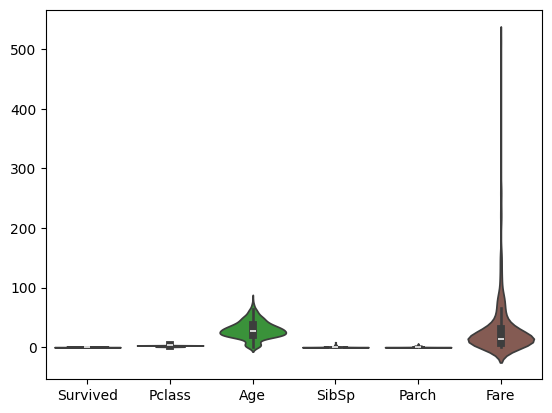

In [150]:
sns.violinplot(df)

<Axes: xlabel='Age', ylabel='Fare'>

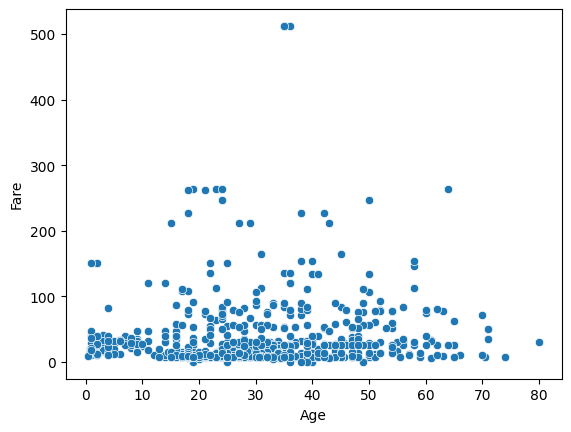

In [151]:
sns.scatterplot(x=df['Age'],y=df['Fare'])

<Axes: >

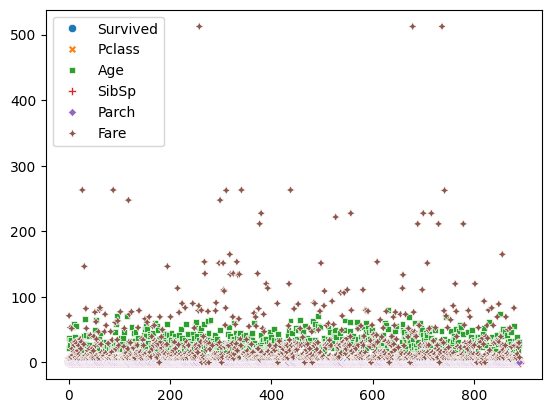

In [152]:
sns.scatterplot(df)

In [153]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test,y_pred_xgb))

NameError: name 'y_pred_xgb' is not defined

# ANN


In [ ]:

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

ann=Sequential()

ann.add(Dense(6))

ann.add(Dense(5,activation='relu'))
ann.add(Dense(4,activation='relu'))
ann.add(Dense(3,activation='relu'))

ann.add(Dense(3,activation='relu'))
ann.add(Dense(2,activation='relu'))

ann.add(Dense(1,activation='sigmoid'))

In [ ]:
ann.compile(loss='binary_crossentropy')

In [ ]:
ann.fit(X_train,y_train,epochs=500)

In [ ]:
ann.evaluate(X_test,y_test)

In [ ]:
pred=ann.predict(X_test)

In [ ]:
np.unique(pred)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score

# Convert probabilities to class labels using a threshold (e.g., 0.5)
pred_binary = (pred > 0.5).astype(int)  # Values above 0.5 become 1, others become 0

# Now calculate the accuracy score
accuracy = accuracy_score(y_test, pred_binary)

print(accuracy)

# logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logi=LogisticRegression()

In [ ]:
logi.fit(X_train,y_train)

In [ ]:
y_pred=logi.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

# SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
svc=SVC()

In [ ]:
param={'kernel':['linear','poly','rbf','sigmoid']}

In [ ]:
gs=GridSearchCV(estimator=svc,param_grid=param,scoring='accuracy')

In [ ]:
gs.fit(X_train,y_train)

In [ ]:
gs.best_params_

In [ ]:
y_pred_svm=gs.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_svm))

# random forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
rf= RandomForestClassifier()

In [ ]:
rf=rf.fit(X_train,y_train)

In [ ]:
# Define parameters specific to RandomForestClassifier
param_rf={'n_estimators':[100,200,300],"bootstrap":[True,False]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Pass the correct param_grid for RandomForestClassifier to GridSearchCV
gs=GridSearchCV(estimator=rf,param_grid=param_rf,scoring='accuracy')

In [ ]:
gs.fit(X_train,y_train)

In [ ]:
gs.best_params_

In [ ]:
y_pred_rf=gs.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_rf))

# XGBOOST

In [154]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [155]:
xgb=XGBClassifier()

In [156]:
param = {
    'learning_rate': [0.15, 0.20, 0.25, 0.30],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5, 7],
    'n_estimators': [100, 200, 300, 400]
}

In [157]:
xgb=GridSearchCV(estimator=xgb,
                 param_grid= param,
                 scoring='accuracy')

In [ ]:
gs.fit(X_train,y_train)

In [ ]:
gs.best_params_

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_estimator_.fit(X_train,y_train)

In [ ]:
y_pred_xgb=gs.best_estimator_.predict(X_test)

In [ ]:
y_pred_xgb

In [ ]:
print(classification_report(y_test,y_pred_xgb))

# descion tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
dsc=DecisionTreeClassifier()

In [ ]:
gs.fit(X_train,y_train)

In [ ]:
y_pred_dsc=gs.best_estimator_.predict(X_test)

In [ ]:
y_pred_dsc

In [ ]:
print(classification_report(y_test,y_pred_dsc))